# >CODECLAUSE
# >DATASCIENCE INTERN

### PROJECT MANAGER - PRATIK KATE SIR
### PROJECT NAME - MARKET BASKET ANALYSIS IN PYTHON USING APRIORI ALGORITHM
### NAME - RAMADEVU SAI DURGA LAHARI

In [ ]:
#External package need to install
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=0708c0f58793cc6b04875ba39f8cd9564b115d6611eb93e96af2811d24a5127e
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
#import all required packages..
import pandas as pd
import numpy as np
from apriori import apriori

In [ ]:
#loading market basket dataset..

df = pd.read_csv("/content/Market_Basket_Optimisation.csv")



In [ ]:
#loading market basket dataset..
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#replacing empty value with 0.
df.fillna(0,inplace=True)

In [ ]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
#for using aprori need to convert data in list format..
# transaction = [['apple','almonds'],['apple'],['banana','apple']]....
transactions = []
for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

In [ ]:
transactions[0]

['burgers', 'meatballs', 'eggs', '0.0']

In [ ]:
#Call apriori function which requires minimum support, confidance and lift, min length is combination of item default is 2".
rules = apriori(transactions,min_support=0.003,min_confidance=0.2,min_lift=3,min_length=2)

In [ ]:
#it generates a set of rules in a generator file...
rules

<generator object apriori at 0x7f732eb18350>

In [ ]:
# all rules need to be converted in a list..
Results = list(rules)
Results

In [ ]:
#convert result in a dataframe for further operation...
df_results = pd.DataFrame(Results)

In [ ]:
# as we see order statistics itself a list so need to be converted in proper format..
df_results.head()

,items,support,ordered_statistics
0,"(cottage cheese, brownies)",0.003467,"[((brownies), (cottage cheese), 0.102766798418..."
1,"(chicken, light cream)",0.004533,"[((chicken), (light cream), 0.0755555555555555..."
2,"(escalope, mushroom cream sauce)",0.005733,"[((escalope), (mushroom cream sauce), 0.072268..."
3,"(pasta, escalope)",0.005867,"[((escalope), (pasta), 0.07394957983193277, 4...."
4,"(fresh bread, tomato juice)",0.004267,"[((fresh bread), (tomato juice), 0.09907120743..."


In [ ]:
#keep support in a separate data frame so we can use later.. 
support = df_results.support

In [ ]:
'''
convert orderstatistic in a proper format.
order statistic has lhs => rhs as well rhs => lhs we can choose any one for convience i choose first one which is 'df_results['ordered_statistics'][i][0]'
''' 

#all four empty list which will contain lhs, rhs, confidance and lift respectively.

first_values = []
second_values = []
third_values = []
fourth_value = []

# loop number of rows time and append 1 by 1 value in a separate list.. first and second element was frozenset which need to be converted in list..
for i in range(df_results.shape[0]):
    single_list = df_results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_value.append(single_list[3])

In [ ]:
#convert all four list into dataframe for further operation..
lhs = pd.DataFrame(first_values)
rhs= pd.DataFrame(second_values)
confidance=pd.DataFrame(third_values,columns=['Confidance'])
lift=pd.DataFrame(fourth_value,columns=['lift'])

In [ ]:
#concat all list together in a single dataframe
df_final = pd.concat([lhs,rhs,support,confidance,lift], axis=1)
df_final

,0,1,0,1,2,3,support,Confidance,lift
0,brownies,None,cottage cheese,None,None,None,0.003467,0.102767,3.238450
1,chicken,None,light cream,None,None,None,0.004533,0.075556,4.843305
2,escalope,None,mushroom cream sauce,None,None,None,0.005733,0.072269,3.790327
3,escalope,None,pasta,None,None,None,0.005867,0.073950,4.700185
4,fresh bread,None,tomato juice,None,None,None,0.004267,0.099071,3.273278
...,...,...,...,...,...,...,...,...,...
183,ground beef,pancakes,0.0,spaghetti,mineral water,None,0.003067,0.211009,3.532520
184,ground beef,None,0.0,tomatoes,spaghetti,mineral water,0.003067,0.031208,3.343671
185,olive oil,None,0.0,milk,spaghetti,mineral water,0.003333,0.050710,3.223089
186,milk,mineral water,0.0,spaghetti,shrimp,None,0.003067,0.063889,3.013627


In [ ]:
'''
load apriori and association package from mlxtend. 
Used different dataset because mlxtend need data in below format. 

             itemname  apple banana grapes
transaction  1            0    1     1
             2            1    0     1  
             3            1    0     0
             4            0    1     0
             
 we could have used above data as well but need to perform operation to bring in this format instead of that used seperate data only.            
'''


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
df1 = pd.read_csv('/content/data.csv', encoding="ISO-8859-1")
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# data has many country choose any one for check..
df1.Country.value_counts().head(5)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [ ]:
#using only France country data for now can check for other as well..
df1 = df1[df1.Country == 'France']

In [ ]:
# some spaces are there in description need to remove else later operation it will create problem..
df1['Description'] = df1['Description'].str.strip()

In [ ]:
# some spaces are there in description need to remove else later operation it will create problem..
df1['Description'] = df1['Description'].str.strip()

In [ ]:
df1[df1.Country == 'France'].head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12-01-2010 08:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12-01-2010 08:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12-01-2010 08:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12-01-2010 08:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12-01-2010 08:45,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12-01-2010 08:45,0.85,12583.0,France
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12-01-2010 08:45,1.25,12583.0,France
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12-01-2010 08:45,2.95,12583.0,France
34,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12-01-2010 08:45,2.95,12583.0,France
35,536370,22629,SPACEBOY LUNCH BOX,24,12-01-2010 08:45,1.95,12583.0,France


In [ ]:
#convert data in format which it require converting using pivot table and Quantity sum as values. fill 0 if any nan values

basket = pd.pivot_table(data=df1,index='InvoiceNo',columns='Description',values='Quantity', \
                        aggfunc='sum',fill_value=0)

In [ ]:

basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#this to check correctness after binning it to 1 at below code..
basket['ALARM CLOCK BAKELIKE RED'].head(10)

InvoiceNo
536370    24
536852     0
536974     0
537065     4
537463     0
537468     0
537693     0
537897     0
537967     0
538008     0
Name: ALARM CLOCK BAKELIKE RED, dtype: int64

In [ ]:
# we dont need quantity sum we need either has taken or not so if user has taken that item mark as 1 else he has not taken 0.

def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
basket_sets = basket.applymap(convert_into_binary)

In [ ]:
# above steps we can same item has quantity now converted to 1 or 0.
basket_sets['ALARM CLOCK BAKELIKE RED'].head()

InvoiceNo
536370    1
536852    0
536974    0
537065    1
537463    0
Name: ALARM CLOCK BAKELIKE RED, dtype: int64

In [ ]:
#remove postage item as it is just a seal which almost all transaction contain. 
basket_sets.drop(columns=['POSTAGE'],inplace=True)


In [ ]:
#call apriori function and pass minimum support here we are passing 7%. means 7 times in total number of transaction that item was present.
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [ ]:
#it will generate frequent itemsets using two step approch
frequent_itemsets


,support,itemsets
0,0.082430,(ALARM CLOCK BAKELIKE GREEN)
1,0.086768,(ALARM CLOCK BAKELIKE PINK)
2,0.080260,(ALARM CLOCK BAKELIKE RED)
3,0.084599,(DOLLY GIRL LUNCH BOX)
4,0.082430,(JUMBO BAG RED RETROSPOT)
5,0.106291,(LUNCH BAG APPLE DESIGN)
6,0.071584,(LUNCH BAG DOLLY GIRL DESIGN)
7,0.130152,(LUNCH BAG RED RETROSPOT)
8,0.101952,(LUNCH BAG SPACEBOY DESIGN)
9,0.099783,(LUNCH BAG WOODLAND)


In [ ]:
# we have association rules which need to put on frequent itemset. here we are setting based on lift and has minimum lift as 1
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.143167,0.117137,0.075922,0.530303,4.527217,0.059152,1.879645
1,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.117137,0.143167,0.075922,0.648148,4.527217,0.059152,2.435209
2,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.143167,0.145336,0.086768,0.606061,4.170059,0.065961,2.169531
3,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.145336,0.143167,0.086768,0.597015,4.170059,0.065961,2.126215
4,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.145336,0.117137,0.088937,0.611940,5.224157,0.071913,2.275071


In [ ]:
# rules_mlxtend.rename(columns={'antecedents':'lhs','consequents':'rhs'})

# as based business use case we can sort based on confidance and lift.
rules_mlxtend[ (rules_mlxtend['lift'] >= 4) & (rules_mlxtend['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.117137,0.108460,0.104121,0.888889,8.195556,0.091417,8.023861
11,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.108460,0.117137,0.104121,0.960000,8.195556,0.091417,22.071584
12,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.086768,0.108460,0.084599,0.975000,8.989500,0.075188,35.661605
13,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.104121,0.112798,0.084599,0.812500,7.203125,0.072854,4.731743
14,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.086768,0.117137,0.084599,0.975000,8.323611,0.074435,35.314534


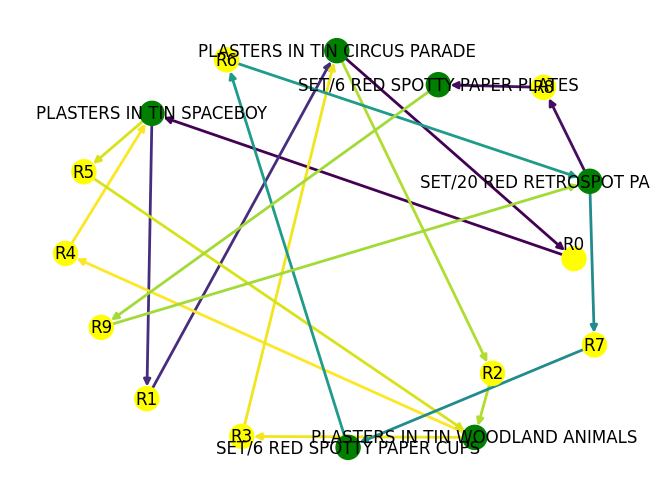

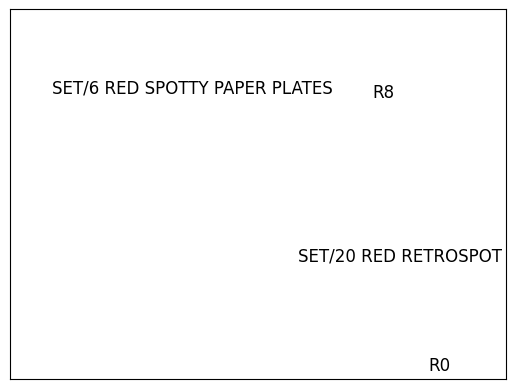

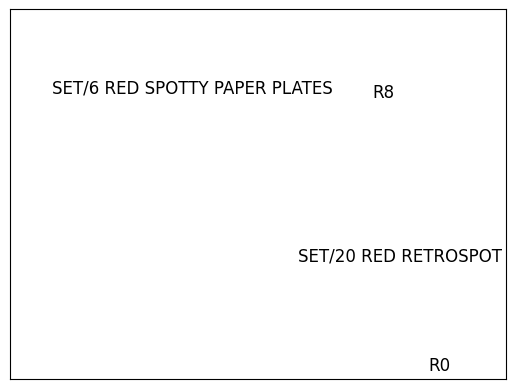

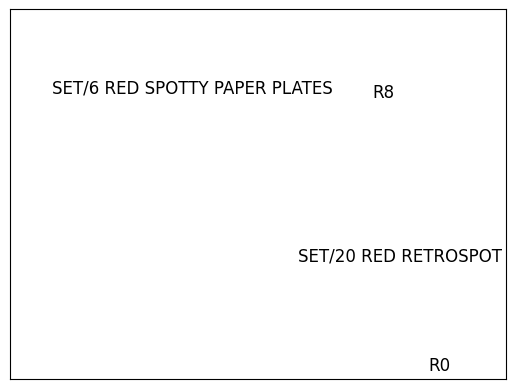

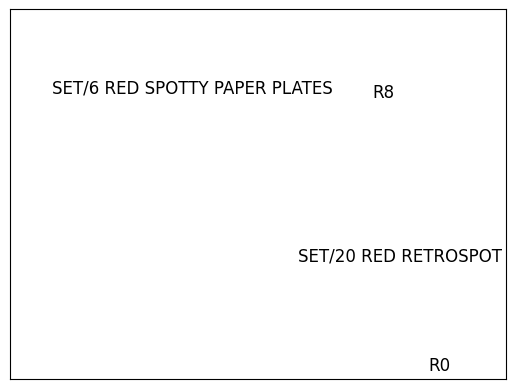

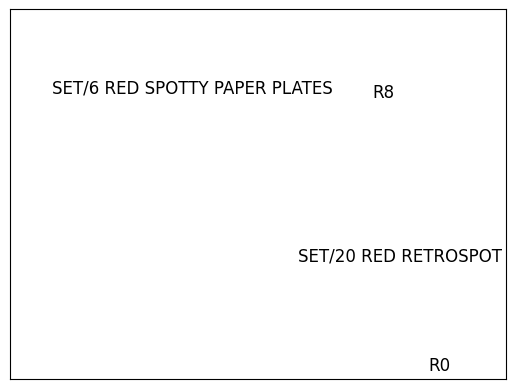

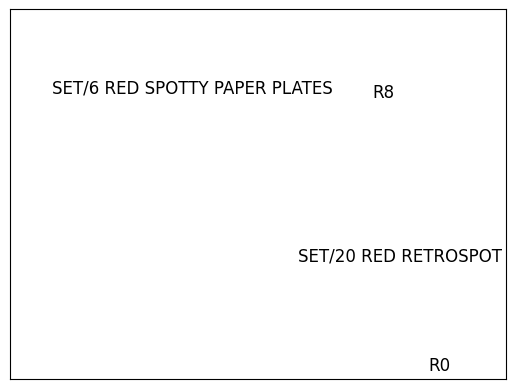

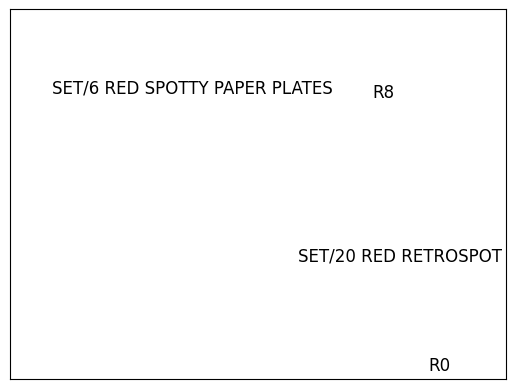

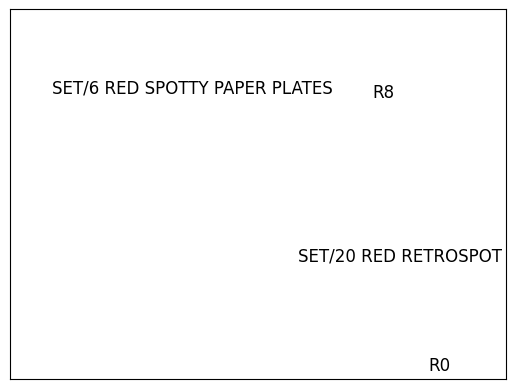

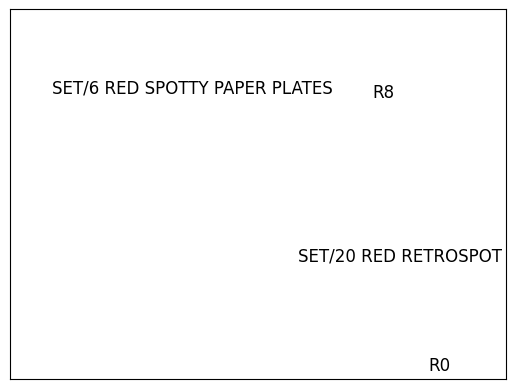

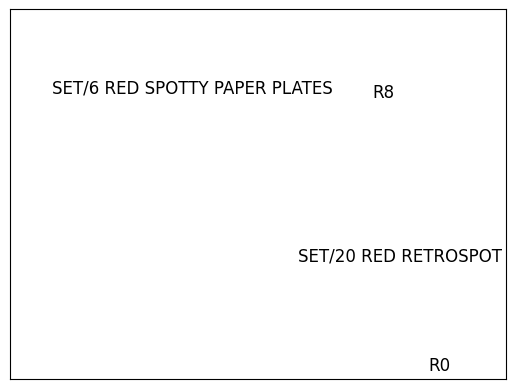

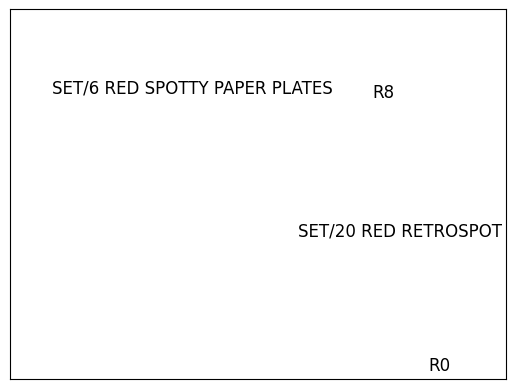

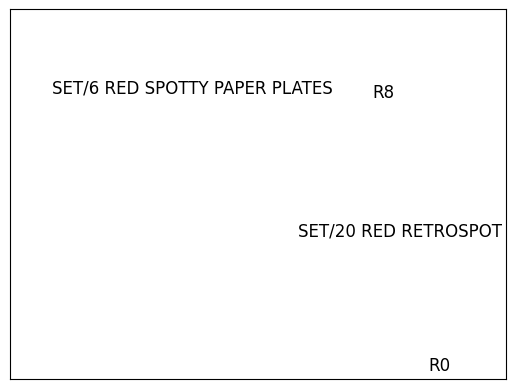

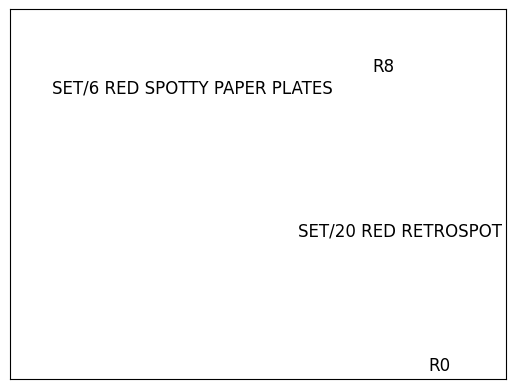

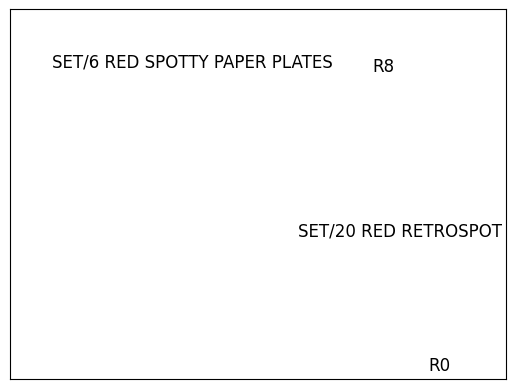

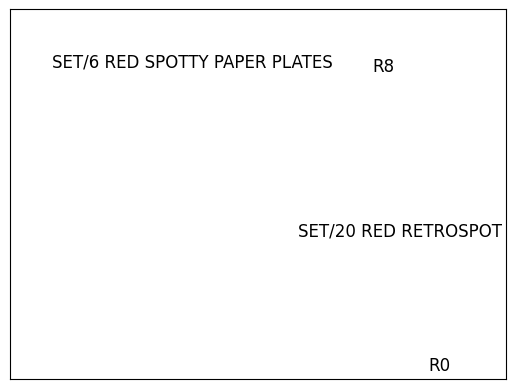

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt  

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos,node_color = color_map, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos)
        plt.show()

draw_graph (rules_mlxtend, 10)